IoU实现原理

In [15]:
import numpy as np
# np.random.seed(0)
array1 = np.random.randint(0, 2, (3, 3))
print('array1:\n',array1)
array2 = np.random.randint(0, 2, (3, 3))
print('array2:\n',array2)
input = array1.reshape(-1)
target = array2.reshape(-1)
print('input:',input)
print('target:',target)
intersection = (input * target).sum()
print('intersection:',intersection)
total = (input + target).sum()
print('total:',total)
union = total - intersection
print('union:',union)
IoU = (intersection) / union
print('IoU:',IoU)

array1:
 [[0 1 1]
 [0 1 0]
 [0 1 1]]
array2:
 [[0 1 0]
 [0 1 0]
 [0 1 0]]
input: [0 1 1 0 1 0 0 1 1]
target: [0 1 0 0 1 0 0 1 0]
intersection: 3
total: 8
union: 5
IoU: 0.6


In [49]:
import torch

def confusion_matrix(preds, labels, conf_matrix):
    preds = torch.argmax(preds, 1)
    for p, t in zip(preds, labels):
        conf_matrix[p, t] += 1
    return conf_matrix

#首先定义一个 分类数*分类数 的空混淆矩阵
conf_matrix = torch.zeros(Emotion_kinds, Emotion_kinds)
# 使用torch.no_grad()可以显著降低测试用例的GPU占用
with torch.no_grad():
    for step, (imgs, targets) in enumerate(test_loader):
        # imgs:     torch.Size([50, 3, 200, 200])   torch.FloatTensor
        # targets:  torch.Size([50, 1]),     torch.LongTensor  多了一维，所以我们要把其去掉
        targets = targets.squeeze()  # [50,1] ----->  [50]

        # 将变量转为gpu
        targets = targets.cuda()
        imgs = imgs.cuda()
        # print(step,imgs.shape,imgs.type(),targets.shape,targets.type())
        
        out = model(imgs)
        #记录混淆矩阵参数
        conf_matrix = confusion_matrix(out, targets, conf_matrix)
        conf_matrix=conf_matrix.cpu()

conf_matrix=np.array(conf_matrix.cpu())# 将混淆矩阵从gpu转到cpu再转到np
corrects=conf_matrix.diagonal(offset=0)#抽取对角线的每种分类的识别正确个数
per_kinds=conf_matrix.sum(axis=1)#抽取每个分类数据总的测试条数

print("混淆矩阵总元素个数：{0},测试集总个数:{1}".format(int(np.sum(conf_matrix)),test_num))
print(conf_matrix)

# 获取每种Emotion的识别准确率
print("每种情感总个数：",per_kinds)
print("每种情感预测正确的个数：",corrects)
print("每种情感的识别准确率为：{0}".format([rate*100 for rate in corrects/per_kinds]))

NameError: name 'Emotion_kinds' is not defined

__生成混淆矩阵__

[0, 0, 2, 0, 1, 2]
[0, 2, 1, 0, 0, 1]
conf_matrix:
 [[2 0 1]
 [1 0 0]
 [0 2 0]]


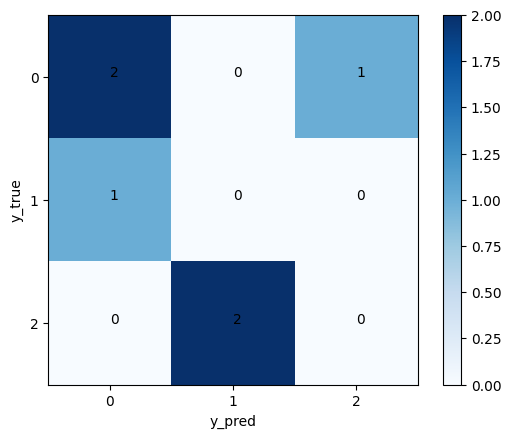

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
trues = [0, 0, 2, 0, 1, 2]
preds = [0, 2, 1, 0, 0, 1]
print(trues)
print(preds)
def get_confusion_matrix(trues, preds):
#   labels = [0,1,2]
  conf_matrix = confusion_matrix(trues, preds)
  return conf_matrix
  
def plot_confusion_matrix(conf_matrix):
  plt.imshow(conf_matrix, cmap=plt.cm.Blues)
  indices = range(conf_matrix.shape[0])
  labels = [0,1,2]
  plt.xticks(indices, labels)
  plt.yticks(indices, labels)
  plt.colorbar()
  plt.xlabel('y_pred')
  plt.ylabel('y_true')
  # 显示数据
  for first_index in range(conf_matrix.shape[0]):
    for second_index in range(conf_matrix.shape[1]):
      plt.text(second_index, first_index,  conf_matrix[first_index, second_index])
  plt.savefig('heatmap_confusion_matrix.jpg')
  plt.show()


if __name__ == "__main__":
    conf_matrix = get_confusion_matrix(trues, preds)
    print('conf_matrix:\n',conf_matrix)
    plot_confusion_matrix(conf_matrix)

In [7]:
import torch.optim as optim
import torch.utils.data
import torch.backends.cudnn as cudnn
from torch.autograd import Variable

gpu_info = Variable(torch.randn(3,3)).cuda()
print(gpu_info)




AssertionError: Torch not compiled with CUDA enabled